# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
pip install citipy

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if ( city not in cities ):
        cities.append(city)
    


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind =city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yinchuan
Processing Record 2 of Set 1 | guanica
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | bereda
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | catia la mar
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | kloulklubed
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | viligili
City not found. Skipping...
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | belaya gora
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | iskateley
Processing Record 

Processing Record 37 of Set 4 | luknovo
Processing Record 38 of Set 4 | oranjemund
Processing Record 39 of Set 4 | paradwip
City not found. Skipping...
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | birao
Processing Record 43 of Set 4 | adamas
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | waingapu
Processing Record 46 of Set 4 | anito
Processing Record 47 of Set 4 | batticaloa
Processing Record 48 of Set 4 | zhigansk
Processing Record 49 of Set 4 | margate
Processing Record 0 of Set 5 | zhezkazgan
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | loa janan
Processing Record 3 of Set 5 | kysyl-syr
Processing Record 4 of Set 5 | pueblo
Processing Record 5 of Set 5 | mehamn
Processing Record 6 of Set 5 | acajutla
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | pacaembu
Processing Record 9 of Set 5 | guantanamo
Processing Record 10 of Set 5 | xinq

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()

In [ ]:
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature


# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75 )
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('latitute')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitute vs. Max Temperature (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('latitute')
plt.ylabel('humidity (%)')
plt.title('City Latitute vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
plt.xlabel('latitute')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitute vs. Cloudiness (2022-10-18)')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

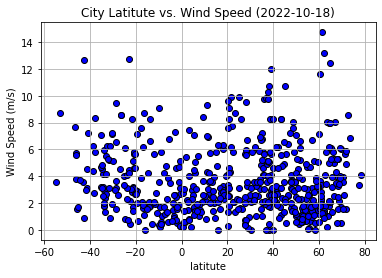

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
plt.xlabel('latitute')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitute vs. Wind Speed (2022-10-18)')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0 , : ].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yinchuan,38.4681,106.2731,267.12,27,15,1.71,CN,1669936056
1,guanica,17.9716,-66.9080,298.83,67,15,3.28,PR,1669936056
2,nanortalik,60.1432,-45.2371,267.24,73,4,7.17,GL,1669935941
3,georgetown,5.4112,100.3354,299.39,81,20,1.54,MY,1669936042
4,bereda,43.2686,-7.5406,278.47,100,13,1.13,ES,1669936057


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 , : ].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,296.96,91,53,12.72,BR,1669935883
1,esperance,-33.8667,121.9000,290.93,81,100,5.93,AU,1669936059
2,cape town,-33.9258,18.4232,291.63,82,46,1.79,ZA,1669935906
3,punta arenas,-53.1500,-70.9167,283.50,69,100,8.71,CL,1669936060
4,castro,-24.7911,-50.0119,291.17,87,6,0.84,BR,1669936061


###  Temperature vs. Latitude Linear Regression Plot

In [31]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def regression_finder(x_values, y_values, y_label, x_axis_anno, y_axis_anno):
    (slope, intercept, rvalue, pvalue, stderr) = linregress( x_values, y_values )
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
    print(f'r value is {rvalue}')
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_axis_anno, y_axis_anno),xytext=(x_axis_anno, y_axis_anno),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    
    
    return
    

r value is -0.8262321902716476


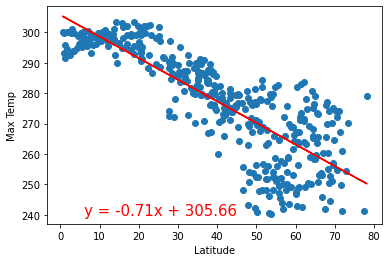

In [32]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', 6, 240 )

r value is 0.6270923805584195


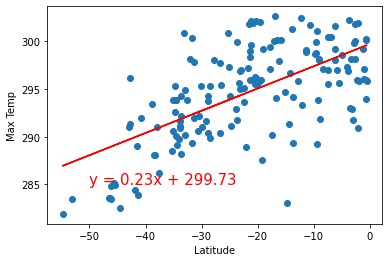

In [33]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', -50, 285)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r value is 0.14723427037513648


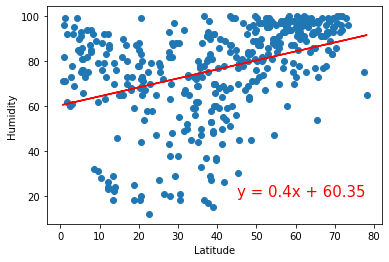

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', 45, 20)

r value is 0.08777194301714461


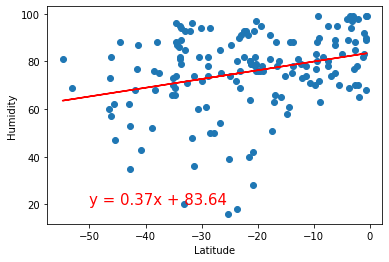

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.05757793321218099


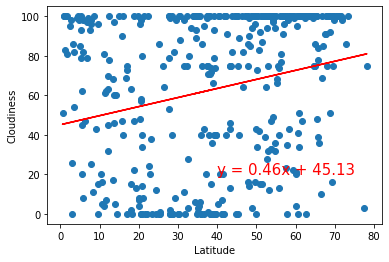

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 40, 20)

r value is 0.03758954605418041


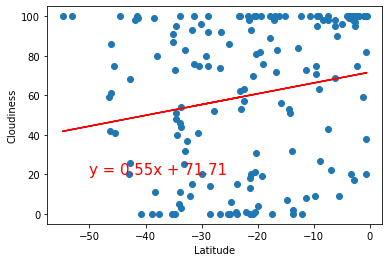

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.0011745346518757932


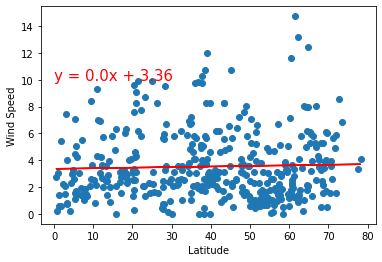

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 0, 10)

r value is 0.10574773122935693


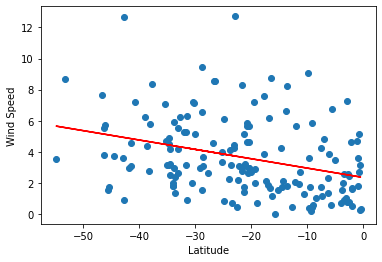

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', -50, 15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Linear regression captures the correlation between two variables. rvalue measures the correlation quantitively. Possible values of the correlation coefficient range from -1 to +1, with -1 indicating a perfectly linear negative, i.e., inverse, correlation (sloping downward) and +1 indicating a perfectly linear positive correlation (sloping upward).

Based on the analysis:
1. latitute and max temperature have a strong negative corralation (rvalues : 0.6 (nouthern) and 0.3 (southern) perspectively) 
2. latitude and humidity have weak positive correlation. The latitute increases, the humidity increases as well.rvalues : 0.14 (northern) and 0.08 (southern) perspectively) 
3. latitude and cloudiness have very weak positive correlation. The latitute increases, the cloudiness increases as well.rvalues : 0.05 (northern) and 0.03(southern) perspectively) 
4. About the wind speed, different trends can be observed. For northern hemisphere,latitude and wind speed have very weak positive correlation (rvaleu 0.01). However, for southern hemisphere, atitude and wind speed have weak negative correlation (rvaleu 0.105)


